## <font size=5> <strong>Heart Disease Prediction By Team Niko
 

## I. Importing essential libraries

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.anaconda', '.android', '.conda', '.condarc', '.config', '.eclipse', '.emulator_console_auth_token', '.gradle', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.m2', '.matplotlib', '.p2', '.packettracer', '.pgAdmin4.1590372639.addr', '.pgAdmin4.1590372639.log', '.pgAdmin4.startup.log', '.spyder-py3', '.tooling', '.VirtualBox', '.vscode', '.zenmap', '3D Objects', 'A1.ipynb', 'advertising.csv', 'Anaconda3', 'ansel', 'AppData', 'Application Data', 'Arpita1.ipynb', 'cartoonizer.ipynb', 'cartoonizer.py', 'Cisco Packet Tracer 7.2', 'Contacts', 'Cookies', 'Covid Analysis - Data Visualization.ipynb', 'Creative Cloud Files', 'DBMI Proj.ipynb', 'debug.log', 'Documents', 'Downloads', 'eclipse', 'eclipse-workspace', 'Favorites', 'Grip.ipynb', 'heart.csv', 'Heart_disease_prediction.ipynb', 'ImagePro.ipynb', 'India_vs_World_COVID_19.ipynb', 'KNN_1.ipynb', 'Links', 'Local Settings', 'Microsoft', 'MicrosoftEdgeBackups', 'Music', 'My Documents', 'mysqlclient-1.4.6-cp38-cp38-win32.whl', 'Net

## II. Importing and understanding our dataset 

In [138]:
dataset = pd.read_csv("heart.csv")

#### Description

In [143]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [144]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Column details:

In [146]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [147]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [148]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### SInce Target variables have only two values'0','1',it is a classification problem

### Checking correlation between columns

In [149]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [150]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

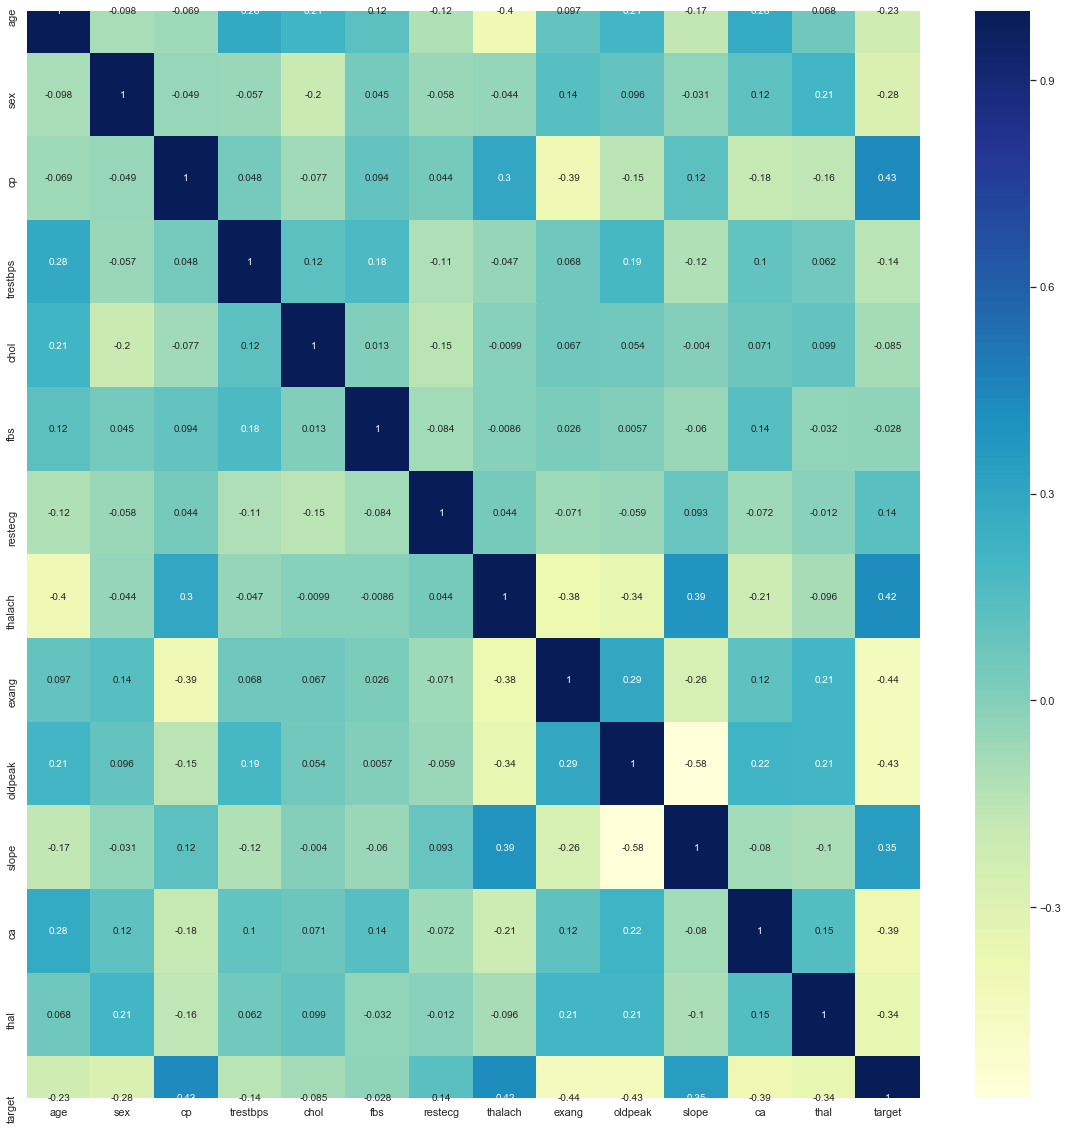

In [151]:
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="YlGnBu")

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021628A34148>,
      dtype=object)

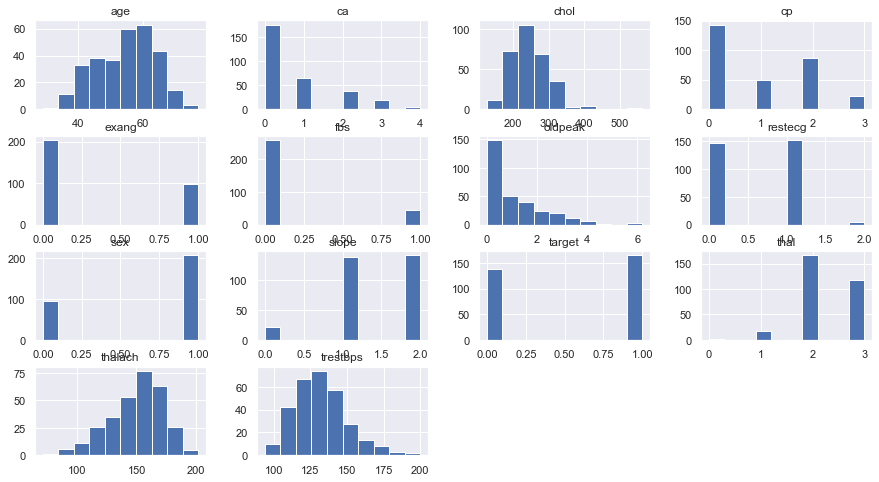

In [198]:
dataset.hist(histtype = 'barstacked')

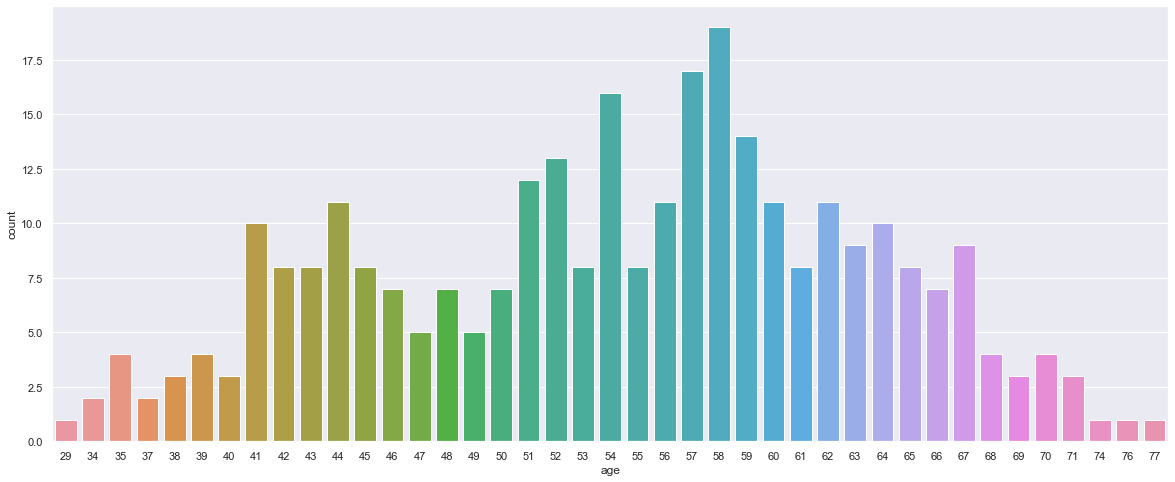

In [153]:
###Age and its relation to heart disease. Are young people more prone to heart disease? ###
plt.figure(figsize=(20,8))
sns.countplot(x=dataset['age'])
#age of 52 - 60 are more prone to heart disease

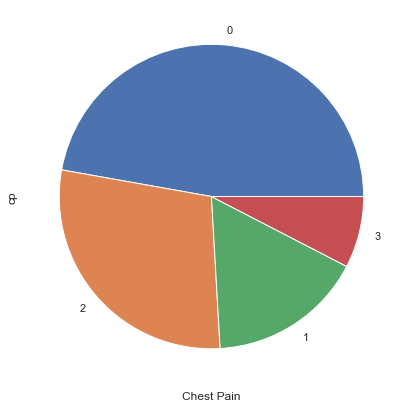

In [154]:
#Plotting types of chest pain
df1=dataset['cp'].value_counts()
df1
plt.figure(figsize=(10,7))
plt.xlabel('Chest Pain')
df1.plot.pie()

1    165
0    138
Name: target, dtype: int64


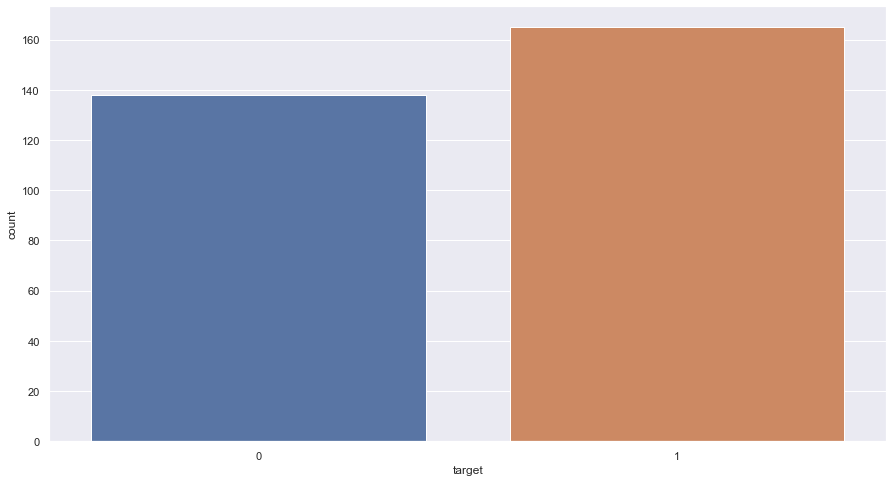

In [199]:
#Plotting target against count
y = dataset["target"]
sns.countplot(y)
target_temp = dataset.target.value_counts()
print(target_temp)

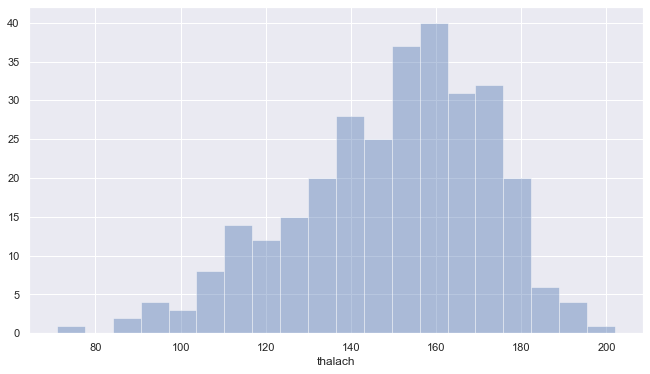

In [156]:
#maximum have a thalach between 160-170 i.e person having heart rate 160-170 suffer from heart disease
plt.figure(figsize=(11,6))
sns.distplot(dataset['thalach'],kde=False,bins=20)


In [200]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [158]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

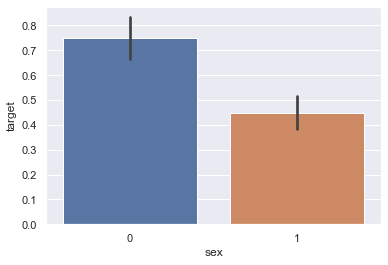

In [159]:
#Sex feature has two unique values
sns.barplot(dataset["sex"],y)

#### females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [160]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

##### the CP feature has values from 0 to 3

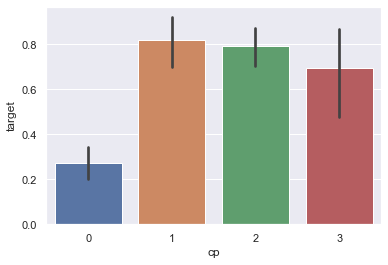

In [161]:
sns.barplot(dataset["cp"],y)

#####  Chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [162]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [163]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

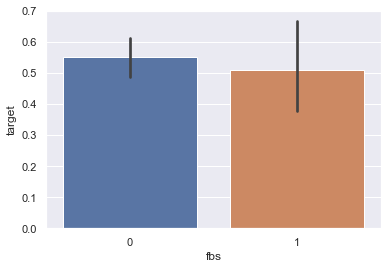

In [164]:
sns.barplot(dataset["fbs"],y)

### Analysing the restecg feature

In [165]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

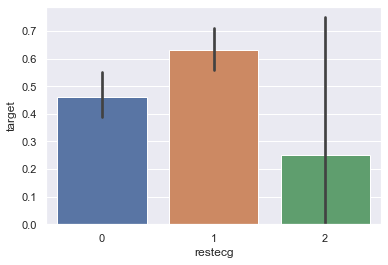

In [166]:
sns.barplot(dataset["restecg"],y)

##### people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [167]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

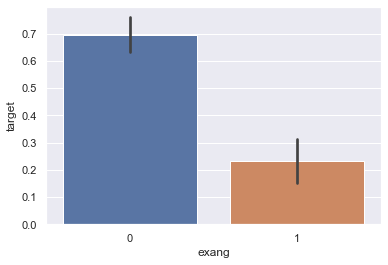

In [168]:
sns.barplot(dataset["exang"],y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [169]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

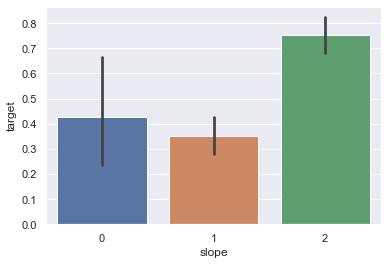

In [170]:
sns.barplot(dataset["slope"],y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [171]:
#number of major vessels (0-3) colored by flourosopy

In [172]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

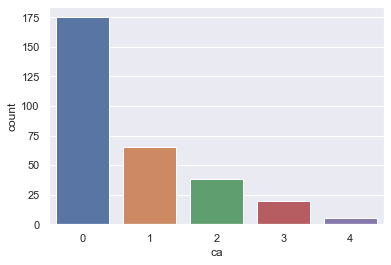

In [173]:
sns.countplot(dataset["ca"])

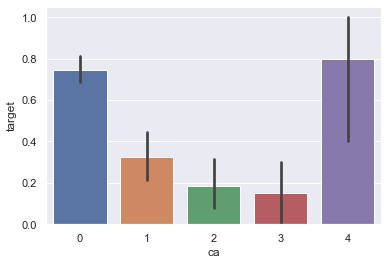

In [174]:
sns.barplot(dataset["ca"],y)

##### ca=4 has astonishingly large number of heart patients

<h5>Analysing the 'thal' feature</h5>

In [175]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

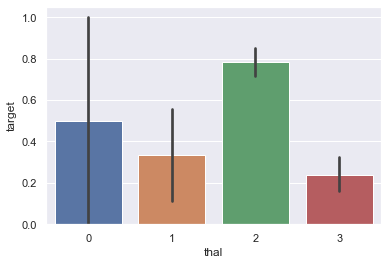

In [176]:
sns.barplot(dataset["thal"],y)

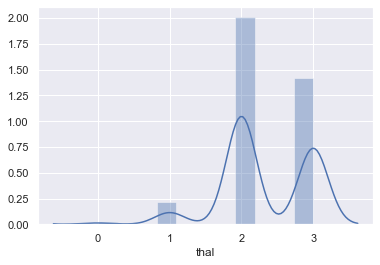

In [177]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [178]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [179]:
X_train.shape

(242, 13)

In [180]:
X_test.shape

(61, 13)

In [181]:
Y_train.shape

(242,)

In [182]:
Y_test.shape

(61,)

## V. Model Fitting

In [183]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [184]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [185]:
Y_pred_lr.shape

(61,)

In [186]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [187]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [188]:
Y_pred_nb.shape

(61,)

In [189]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### Decision Tree

In [190]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [191]:
print(Y_pred_dt.shape)

(61,)


In [192]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [193]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [194]:
Y_pred_rf.shape

(61,)

In [195]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 95.08 %


## VI. Output final score

In [196]:
scores = [score_lr,score_nb,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 95.08 %


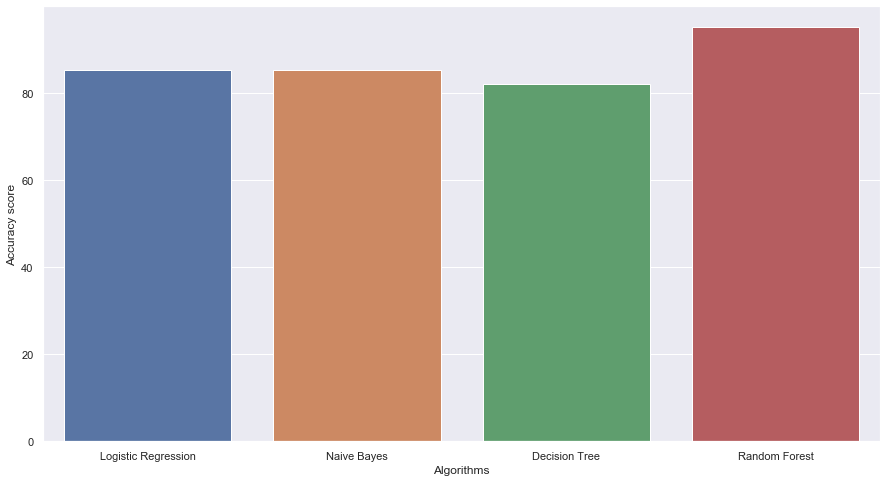

In [197]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)